# Roteiro para análise de dados do Detector de Raios Cósmicos


## Importando Bibliotecas 

Para que as funções que usaremos nesse programa funcionem é necessário carregar o que chamamos de **Bibliotecas**.
Essas são outros programas que contem funções criadas por outras pessoas que nos permitem utilizar ferramentas já prontas para nos ajudar a criar o nosso programa

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cosmic

## Abrindo a Base de Dados

In [15]:
df = pd.read_csv("data.csv")

Antes de partir para qualquer tipo de analise é uma boa prática
tentar entender como os dados estão estruturados e dar uma olhada
no dataset em geral.

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CosmicBlock    100000 non-null  int64 
 1   CounterClocks  100000 non-null  int64 
 2   DetectorId     100000 non-null  int64 
 3   EventCounter   100000 non-null  int64 
 4   EventNumber    100000 non-null  int64 
 5   Format         100000 non-null  int64 
 6   RunNumber      100000 non-null  int64 
 7   TDC            100000 non-null  object
 8   Timestamp      100000 non-null  object
 9   TriggerBits    100000 non-null  int64 
 10  b1             100000 non-null  int64 
 11  b2             100000 non-null  int64 
 12  b11            100000 non-null  int64 
 13  b12            100000 non-null  int64 
 14  b21            100000 non-null  int64 
 15  b22            100000 non-null  int64 
 16  day            100000 non-null  int64 
 17  hour           100000 non-null  int64 
 18  perio

Vemos que os dados são majoritariamente numéricos e somente a coluna TDC e a Timestamp são objetos,
isso ocorre porque eles são lidos como strings no documento .csv . Olhando elas entenderemos melhor o que
representam.

Agora veremos como são as linhas da base de dados:

In [17]:
df.head()

,CosmicBlock,CounterClocks,DetectorId,EventCounter,EventNumber,Format,RunNumber,TDC,Timestamp,TriggerBits,b1,b2,b11,b12,b21,b22,day,hour,period
0,2,718687488,0,1875903232,109491,1,12345,"{'1': {'Calib': [None, None], 'Data': 14221312...",1989-09-29 13:55:03,1000111,100,111,1,0,1,11,29,13,2913
1,2,485350144,0,1892680448,109492,1,12345,"{'1': {'Calib': [None, None], 'Data': 12910592...",1989-09-29 13:55:03,1000111,100,111,1,0,1,11,29,13,2913
2,2,1133446913,0,1909457664,109493,1,12345,"{'1': {'Calib': [None, None], 'Data': 12910592...",1989-09-29 13:55:04,11101000,1110,1000,11,10,10,0,29,13,2913
3,2,1741200640,0,1926234880,109494,1,12345,"{'1': {'Calib': [None, None], 'Data': 12255232...",1989-09-29 13:55:04,1000111,100,111,1,0,1,11,29,13,2913
4,2,4080291072,0,1943012096,109495,1,12345,"{'1': {'Calib': [None, None], 'Data': 12255232...",1989-09-29 13:55:05,1000111,100,111,1,0,1,11,29,13,2913


Essas seriam as cinco primeiras linhas da nossa base de dados, nelas enxergamos coisas interessantes:
* Cada linha é um evento diferente
* Temos informações do horário em que o evento aconteceu
* Sabemos quais foram os sensores acionados em cada detecção

Para que possamos utilizar o Timestamp, devemos convertelo novamente para datetime, o tipo em que o 
Python consegue interpeta-lo

In [35]:
df['Timestamp'] =  pd.to_datetime(df["Timestamp"])

Agora podemos começar a analisar o que temos

## Análise e histogramas dos eventos

### Média de eventos por hora

Temos eventos de dois dias distintos, 29 e 30 de setembro de 2019. 
Vamos inicialmente ver quantos eventos acontecem por hora:

In [45]:
cosmic.MediaPorHora(df,dia=29)

Média diária:4977.636363636364
    hora
13   496
14  5430
15  5444
16  5086
17  5450
18  5412
19  5633
20  5416
21  5415
22  5463
23  5509


In [46]:
cosmic.MediaPorHora(df,dia=30)

Média diária:5027.333333333333
   hora
0  5445
1  5455
2  5394
3  5470
4  5309
5  5486
6  5508
7  5489
8  1690


Distribuição das diferentes ativações dos sensores 

In [40]:
print(df.b1.value_counts(normalize=True))

100     0.56501
1110    0.43430
110     0.00067
1111    0.00001
1       0.00001
Name: b1, dtype: float64


In [41]:
print(df.b2.value_counts(normalize=True))

111     0.56526
1000    0.43381
1111    0.00050
1001    0.00040
110     0.00001
11      0.00001
1       0.00001
Name: b2, dtype: float64


## Histogramas

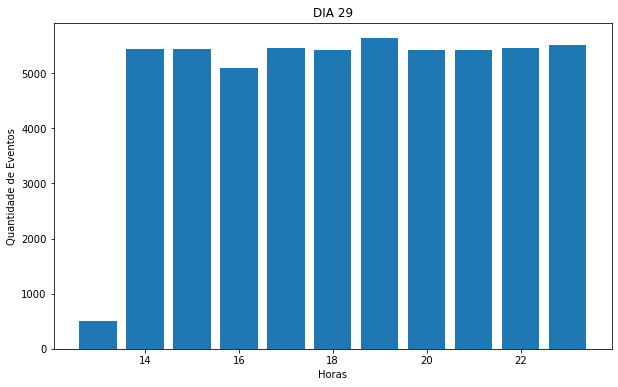

In [47]:
cosmic.HistogramaPorHora(df,dia=29)

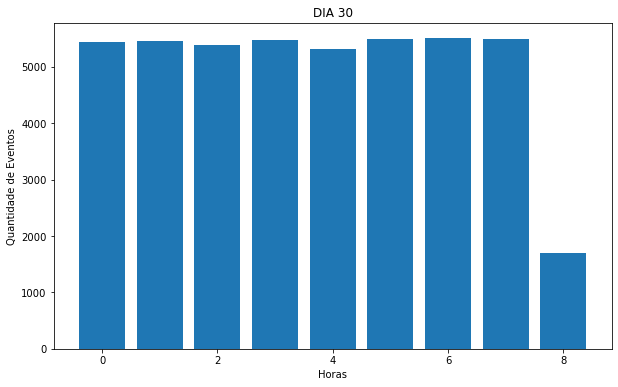

In [48]:
cosmic.HistogramaPorHora(df,dia=30)